<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PADLab2PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Face Recognition using PCA 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [19]:
#load the dataset 
lfw_dataset=fetch_lfw_people(min_faces_per_person=100)
_,h,w=lfw_dataset.images.shape
X=lfw_dataset.data
y=lfw_dataset.target
target_names=lfw_dataset.target_names

In [20]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
y.shape

(1140,)

In [16]:
lfw_dataset.images.shape

(1140, 62, 47)

In [17]:
X.shape

(1140, 62, 47)

In [21]:
X_train.shape

(912, 2914)

In [22]:
#compute the PCA components
n_components=80
from sklearn.decomposition import PCA
pca=PCA(n_components=n_components,whiten=True).fit(X_train)

In [23]:
#apply PCA transformation 
X_train_pca = pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [24]:
X_train_pca.shape

(912, 80)

In [26]:
#training a classifier 
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(1024,),batch_size=256,verbose=True,early_stopping=True).fit(X_train_pca,y_train)

Iteration 1, loss = 1.59978568
Validation score: 0.565217
Iteration 2, loss = 1.11860683
Validation score: 0.532609
Iteration 3, loss = 0.89484985
Validation score: 0.586957
Iteration 4, loss = 0.70665905
Validation score: 0.706522
Iteration 5, loss = 0.56258550
Validation score: 0.771739
Iteration 6, loss = 0.45942564
Validation score: 0.793478
Iteration 7, loss = 0.38563679
Validation score: 0.847826
Iteration 8, loss = 0.32862548
Validation score: 0.858696
Iteration 9, loss = 0.27949180
Validation score: 0.847826
Iteration 10, loss = 0.24033505
Validation score: 0.847826
Iteration 11, loss = 0.20936717
Validation score: 0.858696
Iteration 12, loss = 0.18423225
Validation score: 0.858696
Iteration 13, loss = 0.16214867
Validation score: 0.858696
Iteration 14, loss = 0.14410596
Validation score: 0.880435
Iteration 15, loss = 0.12864475
Validation score: 0.880435
Iteration 16, loss = 0.11521119
Validation score: 0.880435
Iteration 17, loss = 0.10378969
Validation score: 0.880435
Iterat

In [29]:
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test_pca)
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.90      0.82      0.86        57
  Donald Rumsfeld       0.67      0.80      0.73        25
    George W Bush       0.87      0.92      0.89       106
Gerhard Schroeder       0.89      0.53      0.67        15
       Tony Blair       0.81      0.84      0.82        25

         accuracy                           0.85       228
        macro avg       0.83      0.78      0.79       228
     weighted avg       0.85      0.85      0.85       228



In [38]:
def plot_gallery(images, titles, h,w, rows=3, cols =4):
  plt.figure(figsize=(10,10))
  for i in range(rows*cols):

    plt.subplot(rows,cols,i+1)

    plt.imshow(images[i].reshape(h,w),cmap=plt.cm.gray)

    plt.title(titles[i])

    plt.xticks(())

    plt.yticks(())

In [34]:
def titles(y_pred,y_test,target_names):
  for i in range(y_pred.shape[0]):
    pred_name=target_names[y_pred[i]].split(' ')[-1]
    true_name=target_names[y_test[i]].split(' ')[-1]
    yield 'predicted:{0}\n {1}'.format(pred_name,true_name)

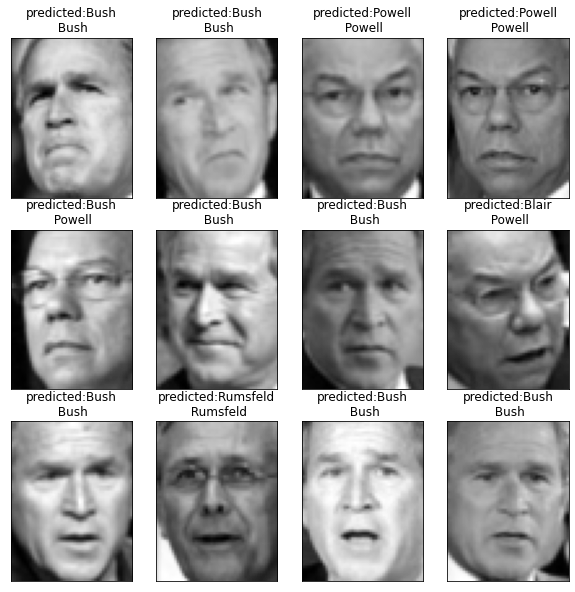

In [39]:
prediction_titles=list(titles(y_pred,y_test,target_names))
plot_gallery(X_test,prediction_titles,h,w)